# Lecture02

## Multiclass classification

### CIS432 Machine Learning for Business Analytics


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

         X1        X2    Y
0 -1.354329 -1.868619  Red


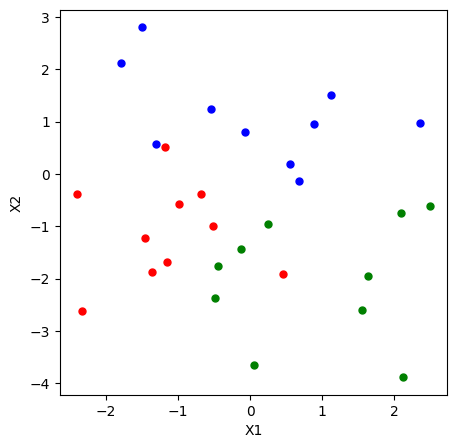

In [ ]:
# Load and visualize a toy dataset
df_multiclass = pd.read_csv('https://drive.google.com/uc?id=1PGChzT35JXBEaY2-EyMH1o5uMzFIjB_7&export=download', index_col=0)
print(df_multiclass.head(1))
fig,ax=plt.subplots(figsize=(5,5))
df_multiclass[df_multiclass['Y']=='Red'].plot.scatter('X1','X2',color='r',s=25,ax=ax)
df_multiclass[df_multiclass['Y']=='Blue'].plot.scatter('X1','X2',color='b',s=25,ax=ax)
df_multiclass[df_multiclass['Y']=='Green'].plot.scatter('X1','X2',color='g',s=25,ax=ax);

In [ ]:
# Fit SVC model with one-vs-one and one-vs-rest
from sklearn import svm
clf_ovo = svm.SVC(kernel='linear',C=1,decision_function_shape='ovo') # ovo: one versus one
clf_ovo = clf_ovo.fit(X=df_multiclass[['X1','X2']],y=df_multiclass['Y'])

clf_ovr = svm.SVC(kernel='linear',C=1,decision_function_shape='ovr') # ovr: one versus rest
clf_ovr = clf_ovr.fit(X=df_multiclass[['X1','X2']],y=df_multiclass['Y'])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


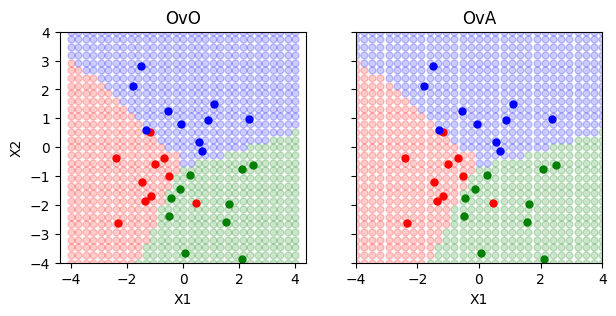

In [ ]:
# Visualize multi-class classifier
fig,axes=plt.subplots(1, 2, figsize=(7,3), sharey=True)
l=4
support = [(k,j) for k in np.linspace(-l,l,31) for j in np.linspace(-l,l,31)]
df_bg = pd.DataFrame(data=support, columns=['X1','X2'])

models = [('OvO',clf_ovo), ('OvA',clf_ovr)]
for i in range(2):
  name, model = models[i][0], models[i][1]
  df_bg['prediction']=model.predict(support)
  df_bg[df_bg['prediction']=='Red'].plot.scatter('X1','X2',color='r', alpha=.2, s=25,ax=axes[i])
  df_bg[df_bg['prediction']=='Blue'].plot.scatter('X1','X2',color='b',alpha=.2, s=25,ax=axes[i])
  df_bg[df_bg['prediction']=='Green'].plot.scatter('X1','X2',color='g',alpha=.2, s=25,ax=axes[i])
  ax.set_xlim([-l,l]); ax.set_ylim([-l,l])
  df_multiclass[df_multiclass['Y']=='Red'].plot.scatter('X1','X2',color='r', s=25,ax=axes[i])
  df_multiclass[df_multiclass['Y']=='Blue'].plot.scatter('X1','X2',color='b', s=25,ax=axes[i])
  df_multiclass[df_multiclass['Y']=='Green'].plot.scatter('X1','X2',color='g', s=25,ax=axes[i])
  plt.gca().set_xlim([-l,l]); plt.gca().set_ylim([-l,l]);
  axes[i].set_title(name)

* The two seem similar in this particular case

Return to the presentation